<a href="https://colab.research.google.com/github/a-nt-1/jupyter2/blob/main/prediccion_series_temporales_ai_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import requests
from io import BytesIO

# Descargar el archivo Excel desde la URL
# Descargar el fichero de la URL
url = "https://docs.google.com/spreadsheets/d/e/2PACX-1vQALTRaLDFfhXOAQmeONPqmFKm9yOiQ4W97rhWgR41BZ7czFsjK5YktD6fnETKHGB9YUnyQ4XBSbhZx/pub?output=xlsx"
response = requests.get(url)
file = BytesIO(response.content)

# Leer las hojas del fichero excel y unirlas en un único DataFrame de pandas

df1 = pd.read_excel(file, sheet_name="2013 a 2025")
df2 = pd.read_excel(file, sheet_name="1988 a 2012")
df = pd.concat([df1, df2])
#dfcopia = df.copy()
df.drop(["R.","COMP."], axis=1, inplace=True)

#print("df    :")
#print(df)

#print("df copia   :")
#dfcopia
# cambiamos el nombre de las columnas
df.rename(columns={"COMB. GANADORA":"N1", "Unnamed: 2":"N2", "Unnamed: 3":"N3", "Unnamed: 4":"N4", "Unnamed: 5":"N5", "Unnamed: 6":"N6", "R.":"Reint."} , inplace=True)

#cambiamos el tipo de dato de Reint a int32

#df.astype({'Reint.': 'int64'}, errors='ignore')
df

#eliminamos las celdas NaN solo las tuplas que tienen todos los valores NaN
df.dropna(how="all", inplace=True)

# Aseguramos que el índice es una serie temporal con formato YYYY/MM/DD si no lo es ya
if not isinstance(df.index, pd.DatetimeIndex):
  df['FECHA'] = pd.to_datetime(df['FECHA'])
  df.set_index('FECHA', inplace=True)
  df.sort_index(inplace=True, ascending=False)

# OPCIÓN para descargar el fichero creado desde colab

descargar = input("¿Deseas descargar el fichero creado? (s/n): ")
if descargar == "s":
  from google.colab import files
  df.to_excel("resultados bonoloto.xlsx")
  files.download("resultados bonoloto.xlsx")




¿Deseas descargar el fichero creado? (s/n): s


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [15]:
from datetime import timedelta
from collections import Counter

def sorteo_profundidad (fecha, profundidad, n):

  sorteo = df.loc[fecha]

  #localizamos el registro siguiente y los n registros siguientes necesarios según la profundidad para tratarlo

  sorteos_anteriores = df.loc[df.index < fecha]
  print("sorteos anteriores antes", sorteos_anteriores)

  sorteos_anteriores = sorteos_anteriores.iloc[:profundidad]
  print("sorteos_anteriores",sorteos_anteriores)

  # hacemos un estudio de los n números más populares de los profundidad sorteos anteriores al sorteo dado indicados por la profundidad para devolver una estructura de datos que permita explotarla después

  sorteos_anteriores_profundidad_n_array = sorteos_anteriores.to_numpy()
  print("sorteos anteriores profundidad array",sorteos_anteriores_profundidad_n_array)

  sorteos_anteriores_profundidad_n_array_flat = sorteos_anteriores_profundidad_n_array.flatten()
  print("sorteos anteriores profundidad array flat",sorteos_anteriores_profundidad_n_array_flat)

  sorteos_anteriores_profundidad_n_array_flat_unique = np.unique(sorteos_anteriores_profundidad_n_array_flat)
  print("sorteos anteriores profundidad array flat unique",sorteos_anteriores_profundidad_n_array_flat_unique)

  sorteos_anteriores_profundidad_n_array_flat_unique_count = np.bincount(sorteos_anteriores_profundidad_n_array_flat)
  print("sorteos anteriores profundidad array flat unique count",sorteos_anteriores_profundidad_n_array_flat_unique_count)

  sorteos_anteriores_profundidad_n_array_flat_unique_count_argsort = np.argsort(sorteos_anteriores_profundidad_n_array_flat_unique_count)
  print("sorteos anteriores profundidad array flat unique count argsort",sorteos_anteriores_profundidad_n_array_flat_unique_count_argsort)

  sorteos_anteriores_profundidad_n_array_flat_unique_count_argsort_reverse = sorteos_anteriores_profundidad_n_array_flat_unique_count_argsort[::-1]


def sorteo_profundidad2 (fecha, profundidad, n):
  sorteo = df.loc[fecha]
  print("sorteo",sorteo)
  #localizamos el registro siguiente y los n registros siguientes necesarios según la profundidad para tratarlo
  sorteos_anteriores = df.loc[df.index < fecha]
  print("sorteos anteriores antes", sorteos_anteriores)
  sorteos_anteriores = sorteos_anteriores.iloc[:profundidad]
  print("sorteos_anteriores",sorteos_anteriores)
  # hacemos un estudio de los n números más populares de los profundidad sorteos anteriores al sorteo dado indicados por la profundidad para devolver una estructura de datos que permita explotarla después

  # Aplanar la lista de arrays en una sola lista
  all_numbers = [num for sorteos in sorteos_anteriores for num in sorteo]

  # Usar Counter para contar las frecuencias
  #frequencies = Counter(all_numbers)
  frequencies = count_frequencies(df)
  print(frequencies)

  return frequencies

'''
  print("fecha",fecha)
  partes_fecha = fecha.split('-')

  print("partes fecha:",partes_fecha)

  fecha2 = partes_fecha[2] + '-' + partes_fecha[1] + '-' + partes_fecha[0]

  fecha2 = pd.to_datetime(fecha2)

  fechafin = fecha2 - timedelta(profundidad, 0)

  print ("fechafin", fechafin)
  print ("fecha", fecha)
  print ("sorteo", sorteo)


  sorteos_anteriores
  sorteos_anteriores_profundidad = sorteos_anteriores.loc[sorteos_anteriores['Profundidad'] == profundidad]
  sorteos_anteriores_profundidad
  sorteos_anteriores_profundidad_n = sorteos_anteriores_profundidad.iloc[:, 0:n]
  sorteos_anteriores_profundidad_n
  sorteos_anteriores_profundidad_n_array = sorteos_anteriores_profundidad_n.to_numpy()

  sorteos_anteriores_profundidad_n_array_flat = sorteos_anteriores_profundidad_n_array.flatten()
  sorteos_anteriores_profundidad_n_array_flat
  sorteos_anteriores_profundidad_n_array_flat_unique = np.unique(sorteos_anteriores_profundidad_n_array_flat)
  sorteos_anteriores_profundidad_n_array_flat_unique
  sorteos_anteriores_profundidad_n_array_flat_unique_count = np.bincount(sorteos_anteriores_profundidad_n_array_flat_unique)
  sorteos_anteriores_profundidad_n_array_flat_unique_count
  sorteos_anteriores_profundidad_n_array_flat_unique_count_argsort = np.argsort(sorteos_anteriores_profundidad_n_array_flat_unique_count)
  sorteos_anteriores_profundidad_n_array_flat_unique_count_argsort
  sorteos_anteriores_profundidad_n_array_flat_unique_count_argsort_reverse = sorteos_anteriores_profundidad_n_array_flat_unique_count_argsort[::-1]
  sorteos_anteriores_profundidad_n_array_flat_unique_count_argsort_reverse

  print(sorteos_anteriores_profundidad_n_array_flat_unique_count_argsort_reverse)

'''

'\n  print("fecha",fecha)\n  partes_fecha = fecha.split(\'-\')\n\n  print("partes fecha:",partes_fecha)\n\n  fecha2 = partes_fecha[2] + \'-\' + partes_fecha[1] + \'-\' + partes_fecha[0]\n\n  fecha2 = pd.to_datetime(fecha2)\n\n  fechafin = fecha2 - timedelta(profundidad, 0)\n\n  print ("fechafin", fechafin)\n  print ("fecha", fecha)\n  print ("sorteo", sorteo)\n\n\n  sorteos_anteriores\n  sorteos_anteriores_profundidad = sorteos_anteriores.loc[sorteos_anteriores[\'Profundidad\'] == profundidad]\n  sorteos_anteriores_profundidad\n  sorteos_anteriores_profundidad_n = sorteos_anteriores_profundidad.iloc[:, 0:n]\n  sorteos_anteriores_profundidad_n\n  sorteos_anteriores_profundidad_n_array = sorteos_anteriores_profundidad_n.to_numpy()\n\n  sorteos_anteriores_profundidad_n_array_flat = sorteos_anteriores_profundidad_n_array.flatten()\n  sorteos_anteriores_profundidad_n_array_flat\n  sorteos_anteriores_profundidad_n_array_flat_unique = np.unique(sorteos_anteriores_profundidad_n_array_flat)\n  

In [16]:
sorteo_profundidad2 ("2024-12-21", 30, 8)



sorteo N1     2
N2     7
N3    23
N4    32
N5    39
N6    41
Name: 2024-12-21 00:00:00, dtype: int64
sorteos anteriores antes             N1  N2  N3  N4  N5  N6
FECHA                             
2024-12-20   3   7   9  15  33  49
2024-12-19  10  16  18  20  24  29
2024-12-18   4   7  18  26  27  39
2024-12-17   4  17  18  31  38  48
2024-12-16   6   9  22  31  32  37
...         ..  ..  ..  ..  ..  ..
1988-03-06   2   5   6  20  29  37
1988-03-02   8  24  25  29  36  39
1988-03-01   8  20  21  29  48  49
1988-02-29  11  31  33  34  41  49
1988-02-28   6   8  12  23  24  45

[8754 rows x 6 columns]
sorteos_anteriores             N1  N2  N3  N4  N5  N6
FECHA                             
2024-12-20   3   7   9  15  33  49
2024-12-19  10  16  18  20  24  29
2024-12-18   4   7  18  26  27  39
2024-12-17   4  17  18  31  38  48
2024-12-16   6   9  22  31  32  37
2024-12-15  13  18  24  29  38  43
2024-12-14  11  15  16  17  24  32
2024-12-13  12  18  28  39  46  47
2024-12-12  22  26  32  3

Counter({2: 6, 7: 6, 23: 6, 32: 6, 39: 6, 41: 6})

In [ ]:
print("df:")
df

print("df copia:")

dfcopia

#print(sorteos_anteriores)

df:
df copia:


,FECHA,COMB. GANADORA,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,COMP.,R.
0,2025-01-31 00:00:00,11,27,28,39,43,48,3,8.0
1,2025-01-30 00:00:00,15,16,21,26,34,37,3,2.0
2,2025-01-29 00:00:00,10,15,18,27,41,43,24,2.0
3,2025-01-28 00:00:00,14,16,26,32,34,49,1,9.0
4,2025-01-27 00:00:00,2,24,29,43,47,49,34,4.0
...,...,...,...,...,...,...,...,...,...
5176,1988-03-06 00:00:00,2,5,6,20,29,37,15,NaN
5177,1988-03-02 00:00:00,8,24,25,29,36,39,47,NaN
5178,1988-03-01 00:00:00,8,20,21,29,48,49,41,NaN
5179,1988-02-29 00:00:00,11,31,33,34,41,49,42,NaN


### 1. Carga de Datos
Para este ejemplo, vamos a simular datos de una serie temporal.

In [ ]:
from collections import Counter

''' datos = [ 3,  7,  9, 15, 33, 49, 10, 16, 18, 20, 24, 29,  4,  7, 18, 26, 27, 3,9  ,4, 17, 18, 31, 38, 48,
  6,  9, 22, 31, 32, 37, 13, 18, 24, 29, 38, 43, 11, 15, 16, 17, 24, 32, 12, 18, 28, 39, 46, 47,
 22, 26, 32, 37, 43, 44,  3,  5, 17, 23, 33, 43,  5,  8, 15, 22, 41, 45 , 2,  7, 18, 23, 45, 47,
  6,  8, 24, 40, 43, 47, 13, 19, 20, 34, 38, 48,  8 19 21 22 44 48  4  8 11 15 22 26
  2 10 13 22 24 42 15 28 34 38 39 44  6 28 29 33 34 46  3  4 19 23 25 49
  6  7  8 17 33 35 20 25 27 28 37 49  1  2  8  9 11 38  6  9 16 19 31 46
  1  8 13 32 33 47  1 21 25 26 29 37  6  7 19 25 28 46  9 20 21 29 35 36
  6 13 14 17 21 30  7 12 18 19 46 48]'''

datos2 = " 3  7  9 15 33 49 10 16 18 20 24 29  4  7 18 26 27 39  4 17 18 31 38 48 6  9 22 31 32 37 13 18 24 29 38 43 11 15 16 17 24 32 12 18 28 39 46 47 22 26 32 37 43 44  3  5 17 23 33 43  5  8 15 22 41 45  2  7 18 23 45 47 6  8 24 40 43 47 13 19 20 34 38 48  8 19 21 22 44 48  4  8 11 15 22 26 2 10 13 22 24 42 15 28 34 38 39 44  6 28 29 33 34 46  3  4 19 23 25 49 6  7  8 17 33 35 20 25 27 28 37 49  1  2  8  9 11 38  6  9 16 19 31 46 1  8 13 32 33 47  1 21 25 26 29 37  6  7 19 25 28 46  9 20 21 29 35 36 6 13 14 17 21 30  7 12 18 19 46 48"

#let arr = str.split(",").map(item => item.trim());

datos_array = str.split(",").map(item => item.trim());
print(datos_array)

datos = datos2.split()

print (sorted(datos2, key=lambda datos: datos2[1] ,reverse=True))

fk = datos(zip(Counter((datos)).keys(), Counter((datos)).values()))
print(fk)




SyntaxError: invalid syntax (<ipython-input-18-be071655c8c0>, line 16)

### 2. Análisis Exploratorio de Datos (EDA)

Primeras filas del DataFrame:
            var1  var2  var3  var4  var5  var6
date                                          
2020-01-01     4     5     6    13    20    39
2020-01-02     7    11    19    29    37    47
2020-01-03     1     4    15    21    35    44
2020-01-04     1    15    20    35    43    43
2020-01-05     8    10    12    17    19    27

Descripción estadística:
              var1         var2         var3         var4         var5  \
count  1461.000000  1461.000000  1461.000000  1461.000000  1461.000000   
mean      7.761123    14.765229    21.470910    28.518823    35.605749   
std       6.329515     7.963292     8.441743     8.492976     7.701401   
min       1.000000     1.000000     2.000000     6.000000     7.000000   
25%       3.000000     9.000000    15.000000    22.000000    30.000000   
50%       6.000000    14.000000    21.000000    29.000000    37.000000   
75%      11.000000    20.000000    28.000000    35.000000    42.000000   
max      36.000000    4

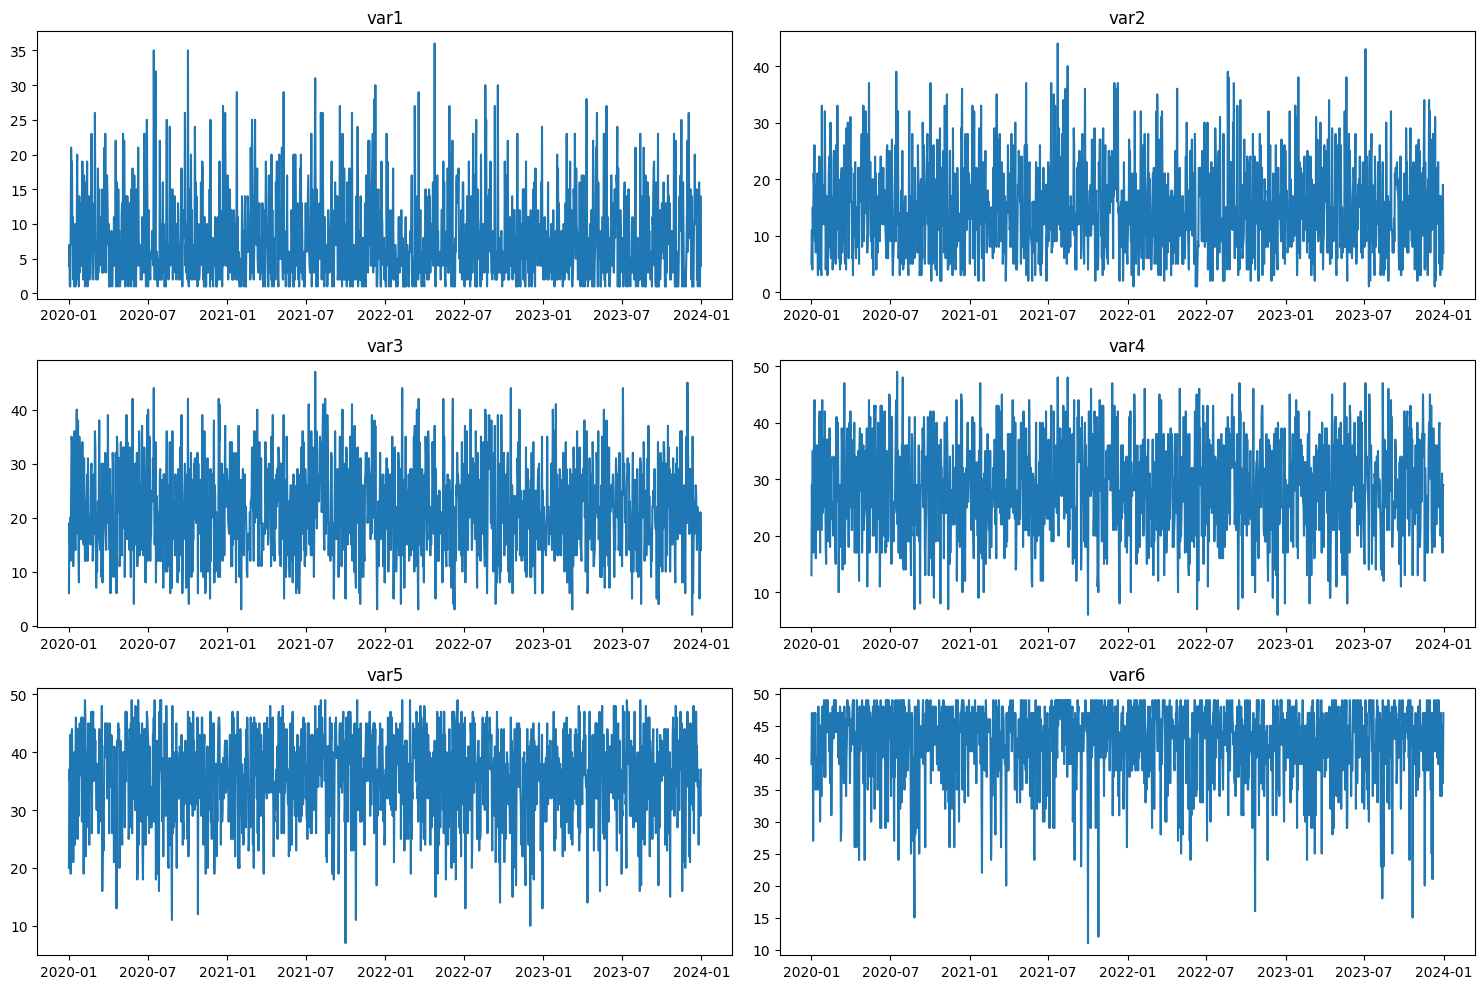

In [ ]:
# Visualizamos las primeras filas del DataFrame
print("Primeras filas del DataFrame:")
print(df.head())

# Descripción estadística de los datos
print("\nDescripción estadística:")
print(df.describe())

# Visualización de las series temporales
plt.figure(figsize=(15, 10))
for i, col in enumerate(df.columns):
    plt.subplot(3, 2, i+1)
    plt.plot(df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

### 3. Descomposición de la Serie Temporal

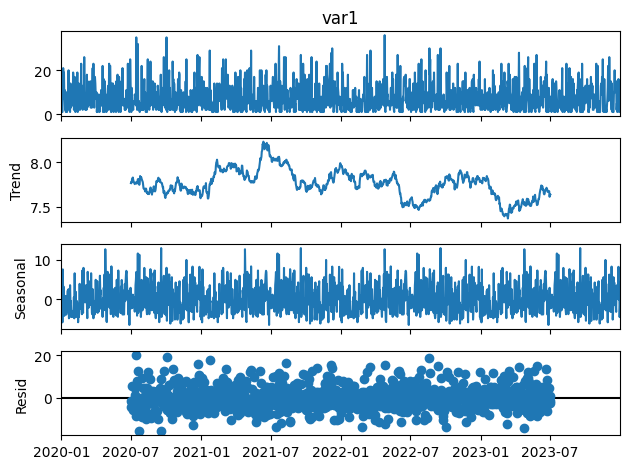

In [ ]:
# Descomponemos la serie temporal para analizar tendencia, estacionalidad y residuales
result = seasonal_decompose(df['var1'], model='additive', period=365)
result.plot()
plt.show()

### 4. Preprocesamiento de Datos

In [ ]:
# Normalizamos los datos para el modelo de predicción
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Convertimos el array normalizado de nuevo a DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns, index=df.index)

# División en conjunto de entrenamiento y prueba
train_size = int(len(scaled_df) * 0.8)
train_df, test_df = scaled_df[:train_size], scaled_df[train_size:]

### 5. Creación de un Modelo de Predicción
Para simplificar, usaremos un modelo de regresión lineal. Nuestro objetivo será predecir 'var1' en función de las otras variables.

In [ ]:
# División en variables independientes (X) y dependiente (y)
X_train, y_train = train_df.drop('var1', axis=1), train_df['var1']
X_test, y_test = test_df.drop('var1', axis=1), test_df['var1']

# Creación y entrenamiento del modelo
model = LinearRegression()
model.fit(X_train, y_train)

# Predicción
y_pred = model.predict(X_test)

### 6. Evaluación del Modelo

In [ ]:
# Calculamos el error cuadrático medio (MSE) y el coeficiente de determinación (R²)
mse = mean_squared_error(y_test, y_pred)
r2 = model.score(X_test, y_test)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")

# Visualización de la predicción
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.legend()
plt.title('Actual vs Predicted')
plt.show()